<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/N_N(Fire_Forest)assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [ ]:
import tensorflow as tf
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
data.duplicated().value_counts()

False    509
True       8
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(509, 31)

In [ ]:
data['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [ ]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.136614,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.177044,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.106347,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.162761,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.329774,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,-0.047670,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,0.270919,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.009262,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,0.000706,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,-0.018868,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903


In [ ]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
# Dropping dummie columns
data.drop(data.columns[11:30],axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 51.7+ KB


In [ ]:
# Converting catigorecal values into numirecal
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
data['month'] = encoder.fit_transform(data['month'])
data['day'] = encoder.fit_transform(data['day'])
data['size_category'] = encoder.fit_transform(data['size_category'])
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [ ]:
#Visualizing the correlation
data.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.149053,-0.003122,-0.161662,0.231234,-0.172492,-0.069237,-0.097232,-0.140640,-0.072934,0.028569,-0.024288
day,-0.149053,1.000000,0.073244,0.068438,0.053815,0.113982,0.151230,-0.109650,-0.035736,0.047466,0.019449,-0.005360
FFMC,-0.003122,0.073244,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,-0.024292
DMC,-0.161662,0.068438,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.046598
DC,0.231234,0.053815,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.028372
ISI,-0.172492,0.113982,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.007867
temp,-0.069237,0.151230,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.009976
RH,-0.097232,-0.109650,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.039730
wind,-0.140640,-0.035736,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,-0.059513
rain,-0.072934,0.047466,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.053463


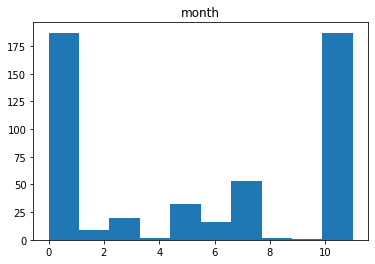

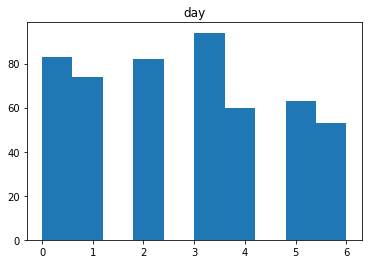

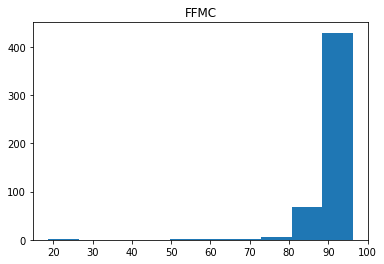

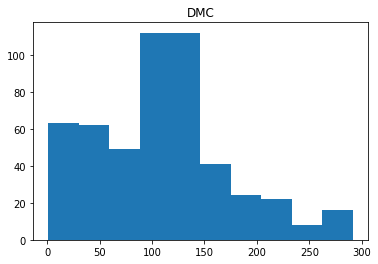

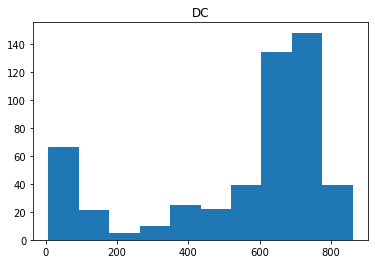

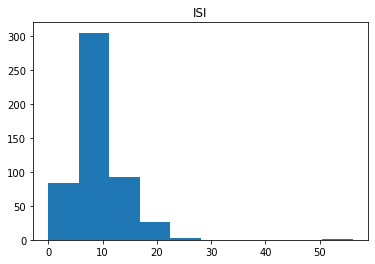

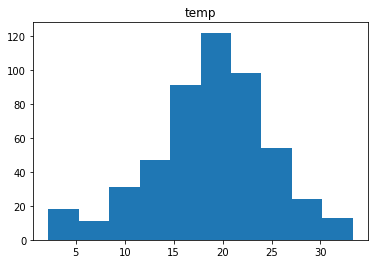

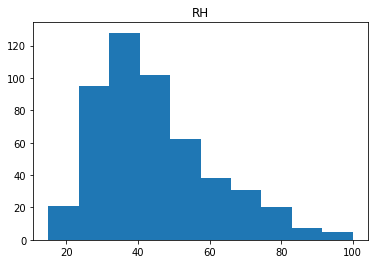

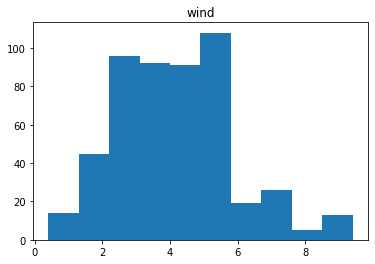

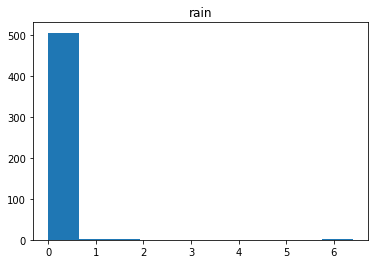

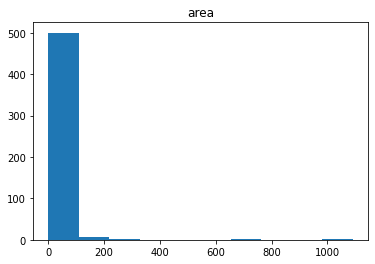

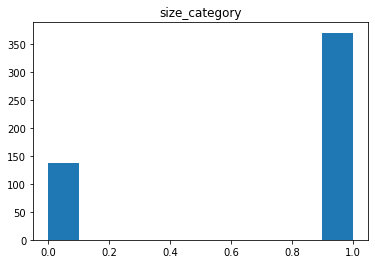

In [ ]:
%matplotlib inline
for i in data:
  plt.hist(data[i])
  plt.title(i)
  plt.show()

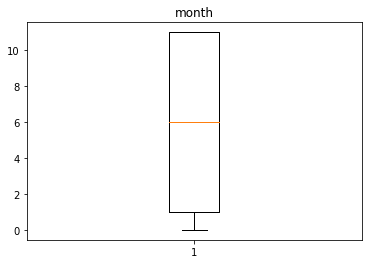

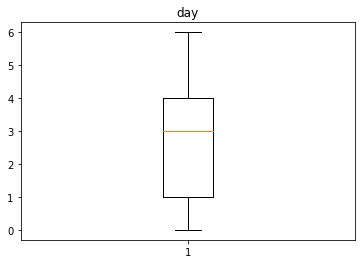

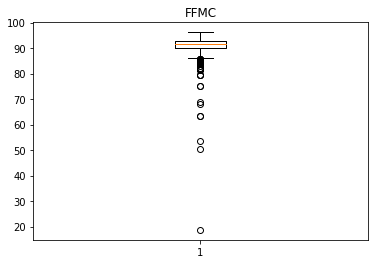

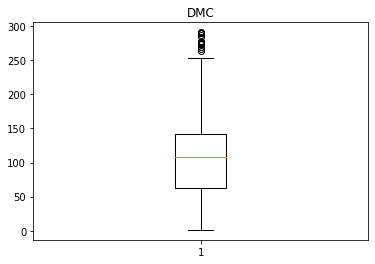

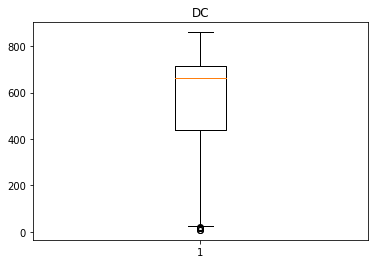

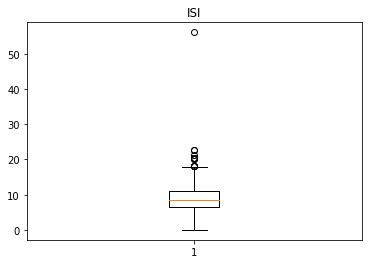

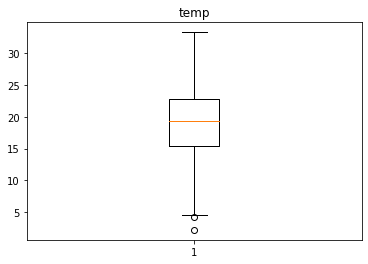

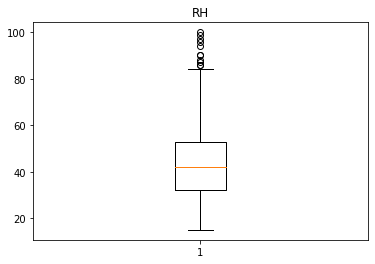

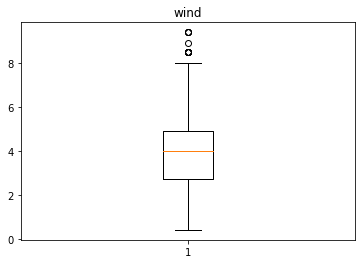

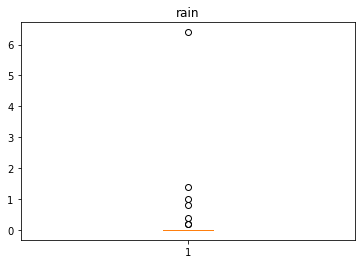

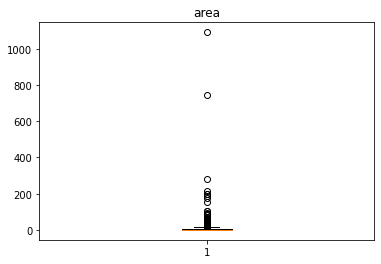

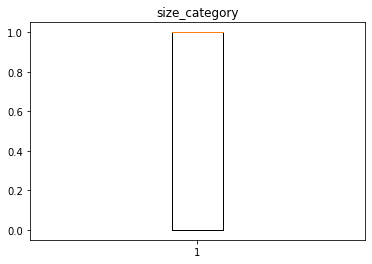

In [ ]:
for i in data:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

Yes, there are so many outliers which are present in our data, this out lier can be importent to us

In [ ]:
data['size_category'].value_counts()

1    371
0    138
Name: size_category, dtype: int64

In [ ]:
# Spliting data into input and output for model building
x = data.iloc[:,:11]
y = data.iloc[:,11] 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((356, 11), (153, 11), (356,), (153,))

In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Creating model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting the model
history = model.fit(x_train,y_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 2.6526 - accuracy: 0.5504 - val_loss: 1.6611 - val_accuracy: 0.5085
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3190 - accuracy: 0.5840 - val_loss: 1.2164 - val_accuracy: 0.6695
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9339 - accuracy: 0.6555 - val_loss: 0.9975 - val_accuracy: 0.6949
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.7521 - val_loss: 0.7680 - val_accuracy: 0.6356
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7269 - val_loss: 0.6988 - val_accuracy: 0.6780
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7731 - val_loss: 0.7714 - val_accuracy: 0.7203
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7857 - val_loss: 0.5656 - val_accuracy: 0.6949
Epoch 8/100
2

In [ ]:
model.weights 

[<tf.Variable 'dense/kernel:0' shape=(11, 12) dtype=float32, numpy=
 array([[ 0.25636458, -0.24603628, -0.07769285,  0.31387186, -0.3697712 ,
          0.06565187,  0.14252435, -0.08409137, -0.02660627, -0.5400832 ,
         -0.49864042,  0.32952332],
        [ 0.02540399, -0.44353813,  0.30623168, -0.14844492,  0.17947687,
          0.2508473 , -0.68305045,  0.2515555 ,  0.18297441, -0.44759467,
          0.11752969, -0.2877057 ],
        [-0.14838971, -0.3169542 , -0.31729084, -0.10343222, -0.1277657 ,
          0.403705  , -0.34096676,  0.4535965 ,  0.05474603,  0.53828627,
          0.15247947, -0.01466855],
        [ 0.23802494,  0.37253797, -0.32216677,  0.1024386 , -0.27431968,
         -0.31789234,  0.36471066, -0.23297016,  0.42740723, -0.05761984,
         -0.30776346,  0.12471771],
        [ 0.3064908 ,  0.34570333,  0.01184206, -0.28643176, -0.5092346 ,
          0.26268443,  0.13786162,  0.02016656,  0.01361195, -0.21131407,
         -0.18451858, -0.11447304],
        [ 0.

In [ ]:
# model evalutation
score = model.evaluate(x_train,y_train)
score

12/12 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9551


[0.12118357419967651, 0.9550561904907227]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.652606,0.550420,1.661121,0.508475,0
1,1.319045,0.584034,1.216382,0.669492,1
2,0.933919,0.655462,0.997526,0.694915,2
3,0.700765,0.752101,0.767964,0.635593,3
4,0.563053,0.726891,0.698812,0.677966,4
...,...,...,...,...,...
95,0.046589,0.987395,0.155526,0.923729,95
96,0.051380,0.978992,0.119364,0.949153,96
97,0.058665,0.987395,0.119734,0.949153,97
98,0.047234,0.991597,0.114693,0.949153,98


Observation :- As our epoch increses the losses get low and accurecy gets high 

# Visualize training history

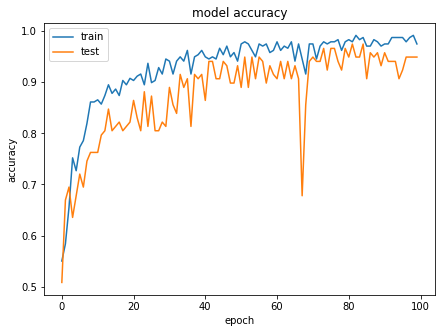

In [ ]:
#summarize history for accurecy
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Obsevation :-  Upto epoch==60 can also give us good results of accuracy on our model both on training_testing 

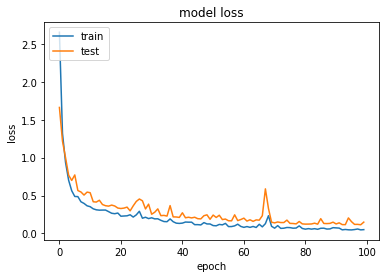

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Obsevation:- but in loss graph we can see that the accuracy loss dorp near to 0 in epoch_size between 0-20 

Hence, we can say that our train_test model score is good.